# Audio, Sinusoidal Functions and STFTs

This notebook goes through some visual maths with sine waves that hopefully allow you to understand how audio is perceived and represented by computers.

DMLAP, March 2023

In [ ]:
!pip install librosa

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as li
import IPython.display as ipd
from scipy import signal

# Sine waves and Sinusoidal Functions

A sine wave, sinusoidal wave, or just sinusoid is a mathematical curve defined in terms of the sine trigonometric function, of which it is the graph. It is a type of continuous wave and also a smooth periodic function. If you could play a sinusoidal function through a speaker, you could hear them!

In [102]:
#Defining the sampling rate, the duration (sec) of our audio sample (wave), and then the number of samples 
#that we will have in total for that duration
sample_rate = 44100
duration = 1
samples = sample_rate * duration
#array of time samples
t = np.arange(samples)/sample_rate
t

array([0.00000000e+00, 2.26757370e-05, 4.53514739e-05, ...,
       9.99931973e-01, 9.99954649e-01, 9.99977324e-01])

In [103]:
#Defining the frequency (Hz) and amplitude (dB) for our audio
freq = 440.
amp = 0.5
y = amp * np.sin(freq * 2 * np.pi * t)
y

array([ 0.        ,  0.03132416,  0.06252526, ..., -0.09348072,
       -0.06252526, -0.03132416])

(-1.0, 1.0)

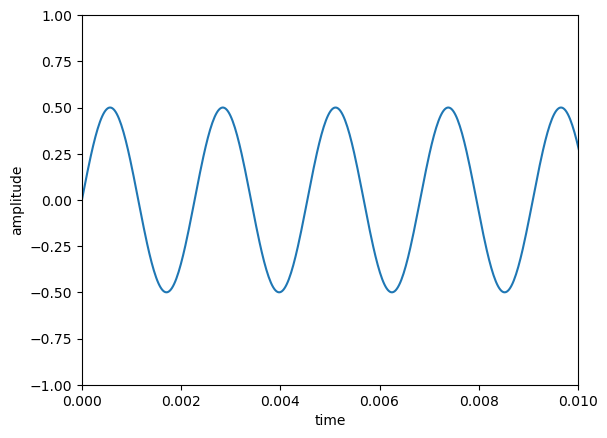

In [104]:
plt.plot(t, y)
plt.xlabel('time')
plt.ylabel('amplitude')

#If you do not limit x and y, you will get too many samples, too close to each other
#that will seem like a solid block of color
plt.xlim(0, 0.01)
plt.ylim(-1, 1) 

In [105]:
ipd.display(ipd.Audio(data=y, rate=sample_rate))

# Sine waves combined

Following the process above but for multiple waves and then merging them all in one single wave.

The single waves below are all pure tones as they have one frequency each. After they get summed together, the new wave will be a complex sound.

In [106]:
freq = [60, 120, 240, 480, 960]
amp = [0.2, 0.5, 0.8, 0.1, 0.9]
waves = []

for f,a in zip(freq, amp):
    y = a * np.sin(f * 2 * np.pi * t)
    waves.append(y)
    ipd.display(ipd.Audio(data=y, rate=sample_rate))


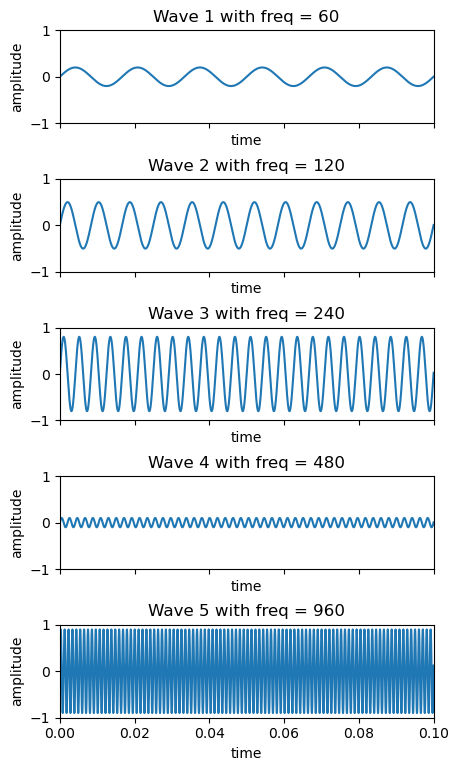

In [107]:
fig, axs = plt.subplots(5, 1, figsize=(5, 8), sharex=True)
fig.tight_layout(pad=3.0)

for idx, ax in enumerate(axs):
    ax.plot(t, waves[idx])
    ax.set_xlabel('time')
    ax.set_ylabel('amplitude')
    ax.set_xlim(0, 0.1)
    ax.set_ylim(-1,1)
    ax.set_title(f'Wave {idx+1} with freq = {freq[idx]}')

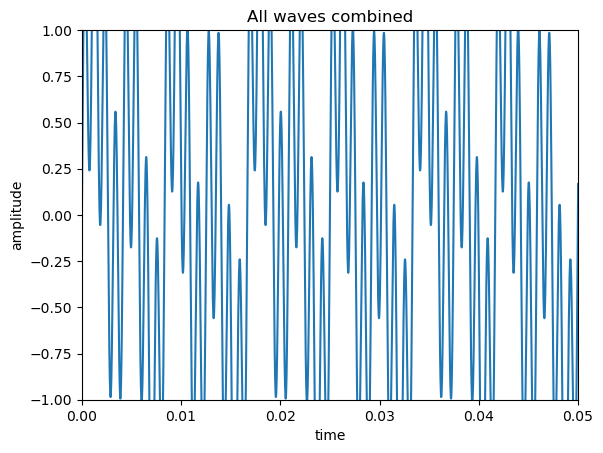

In [108]:
y = np.sum(waves, axis = 0)

plt.plot(t, y)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.xlim(0, 0.05)
plt.ylim(-1,1)
plt.title(f'All waves combined')

ipd.display(ipd.Audio(data=y, rate = sample_rate))

# Short-Time Fourier Transform (STFF)

The Fourier transform is a transform that converts a function into a form that describes the frequencies present in the original function. The short-time Fourier transform, is a Fourier-related transform used to determine the sinusoidal frequency and phase content of local sections of a signal (in small time frames) as it changes over time.

Sound as a spectrogram, i.e. a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform.

So now, we will move from the time domain (visualisation of the wave above), to the frequency domain (visualisation of the same wave below).

In [109]:
f, t, Zxx = signal.stft(y, fs = sample_rate, nperseg=2048, noverlap=512)
print(f.shape, t.shape, Zxx.shape)

(1025,) (30,) (1025, 30)


Text(0, 0.5, 'frequency')

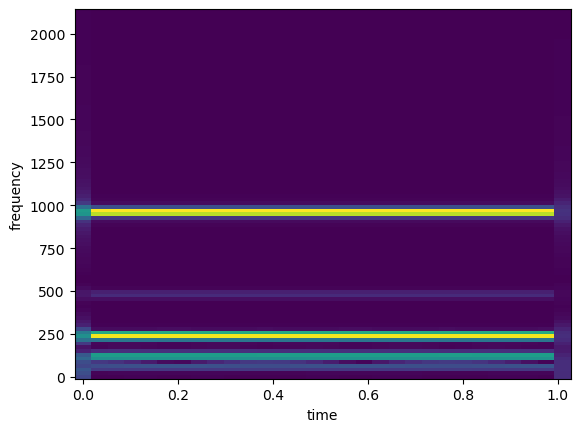

In [113]:
f_ = f[:100]
Zxx_ = Zxx[:100,:]
plt.pcolormesh(t, f_, np.abs(Zxx_))
plt.xlabel('time')
plt.ylabel('frequency')

And now we can do inverse transformation, from frequency representation to time representation and the audio file.

In [116]:
t, y_reborn = signal.istft(Zxx)
ipd.display(ipd.Audio(data=y_reborn, rate=sample_rate))